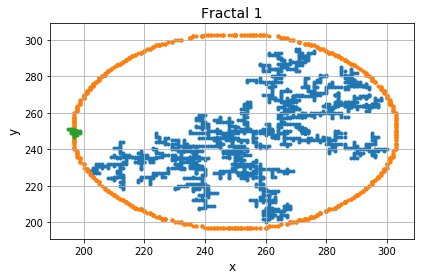

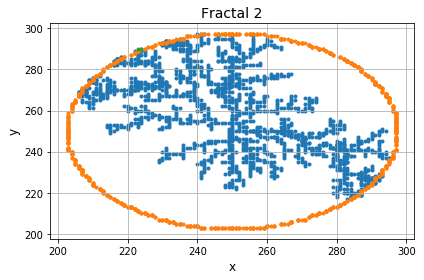

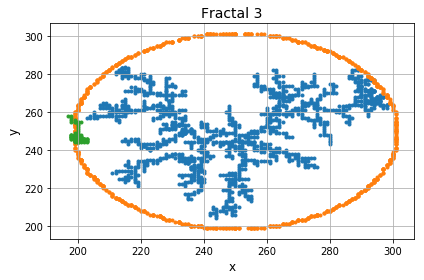

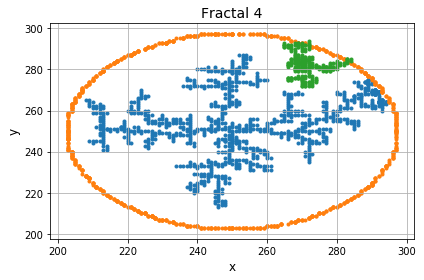

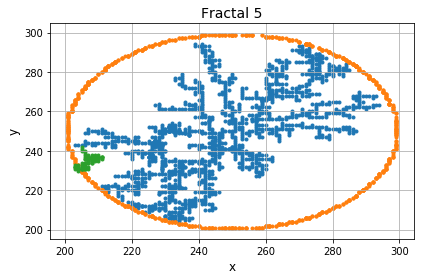

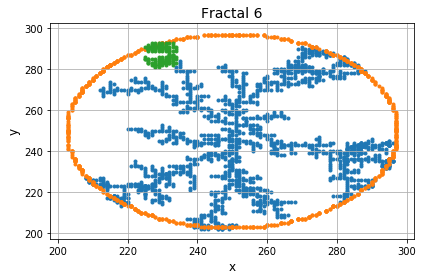

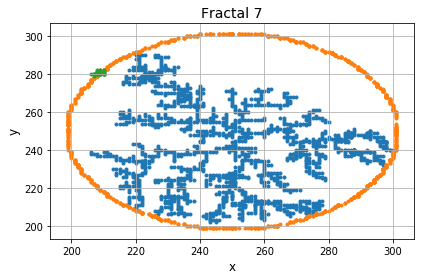

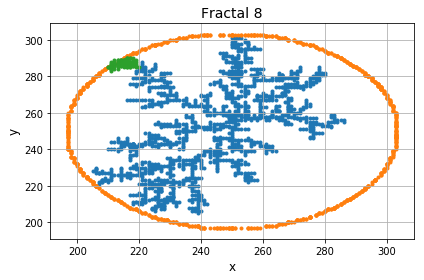

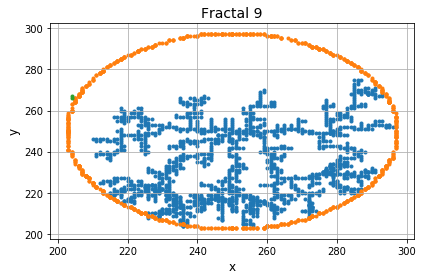

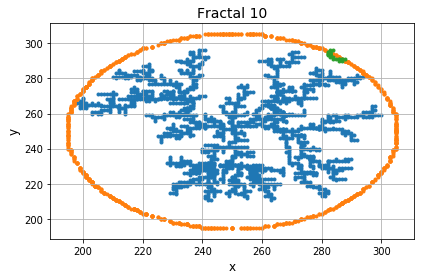

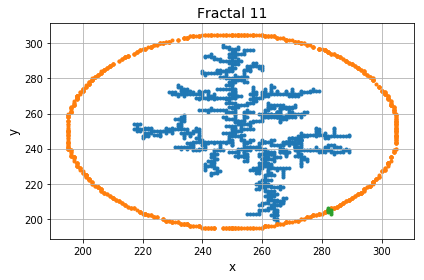

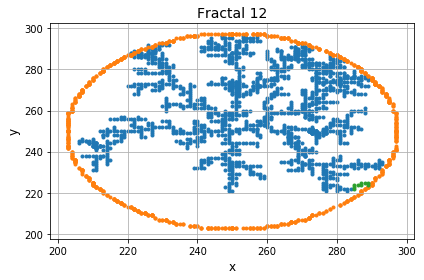

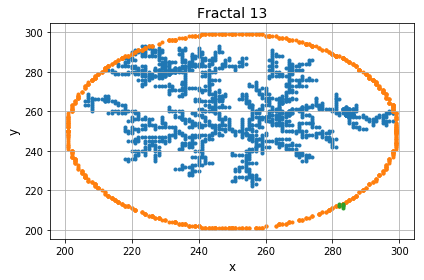

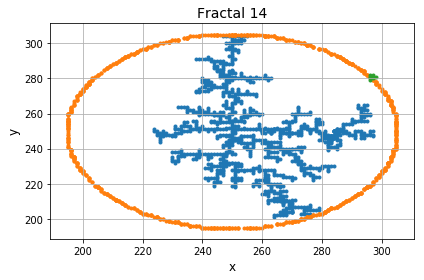

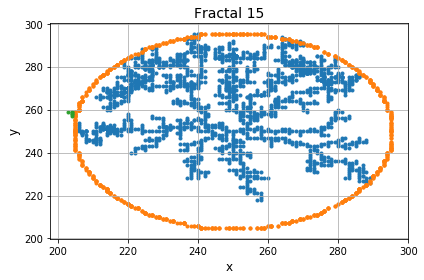

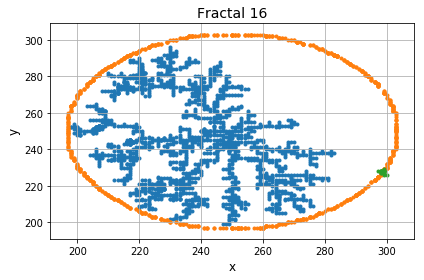

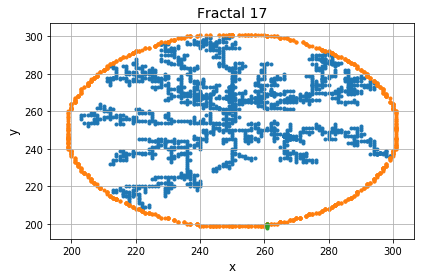

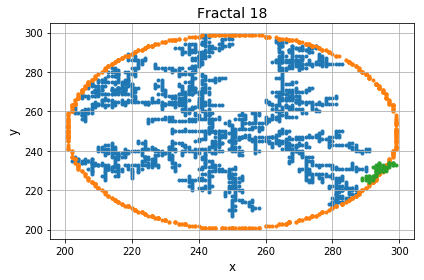

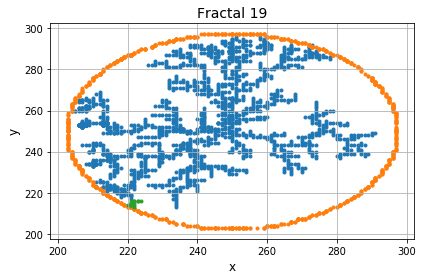

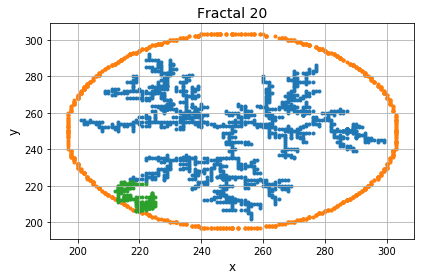

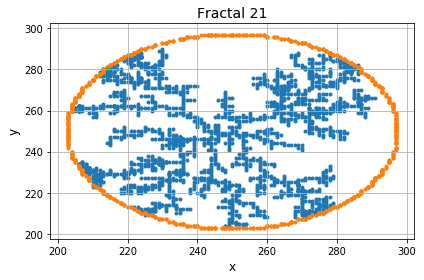

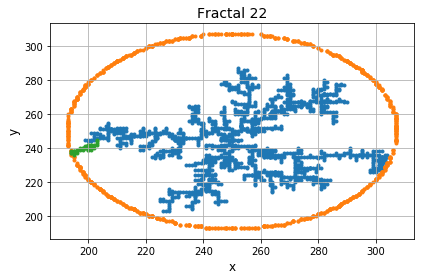

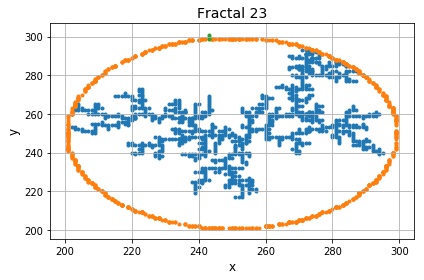

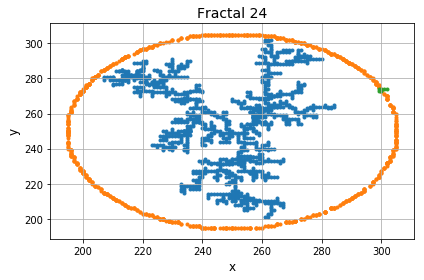

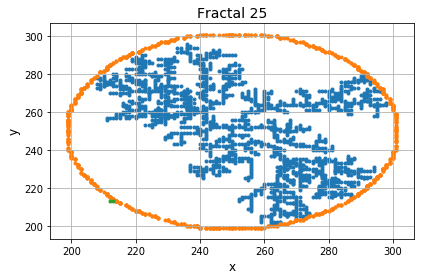

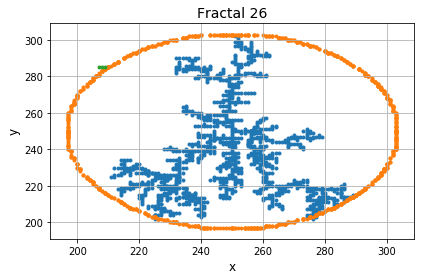

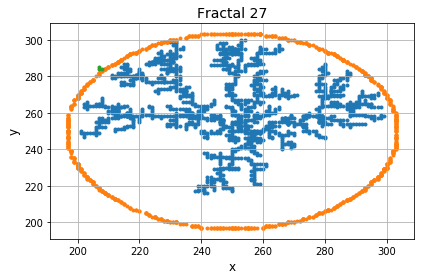

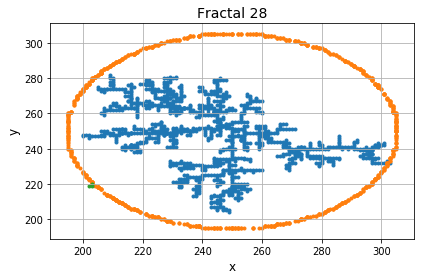

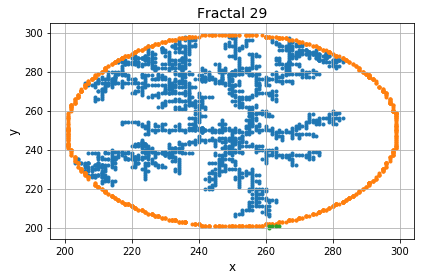

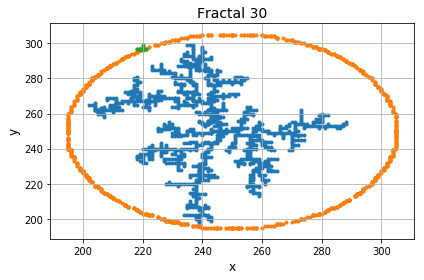

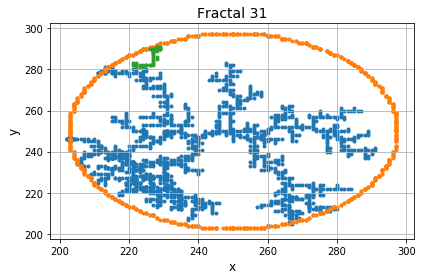

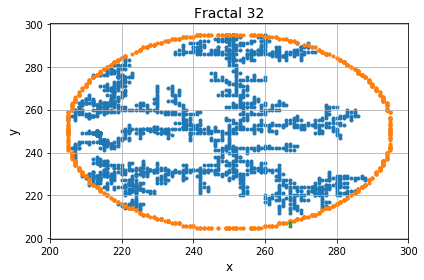

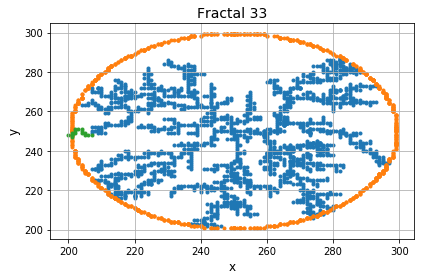

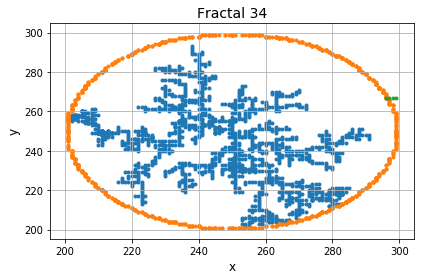

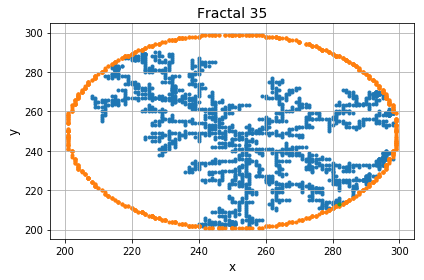

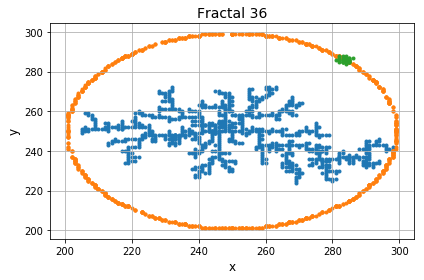

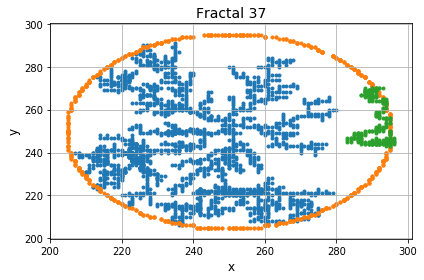

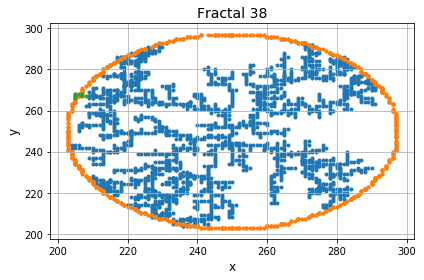

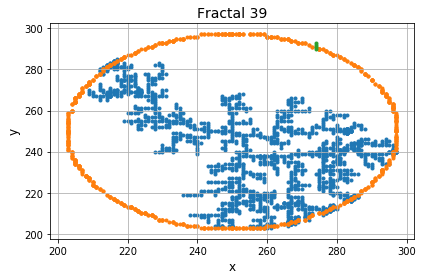

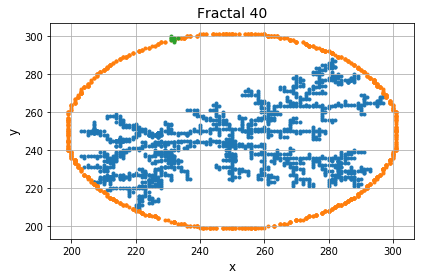

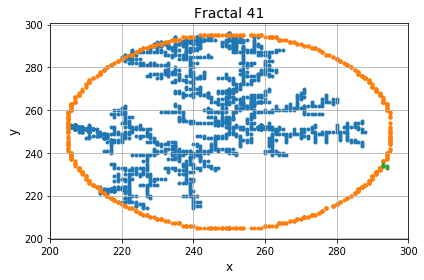

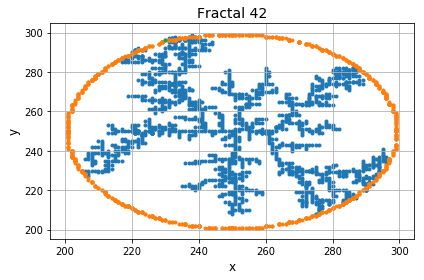

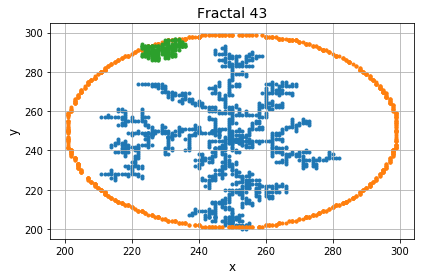

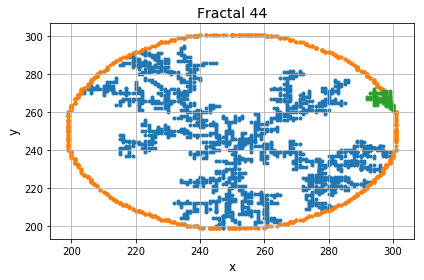

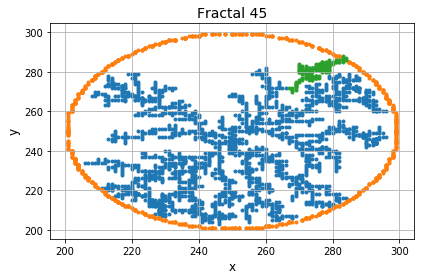

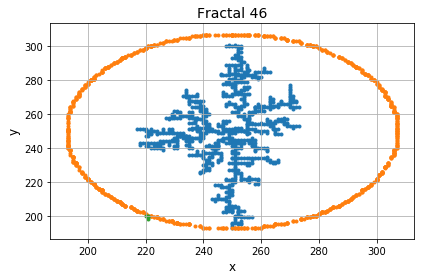

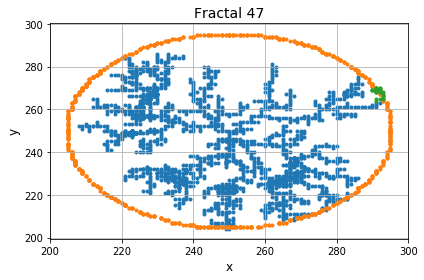

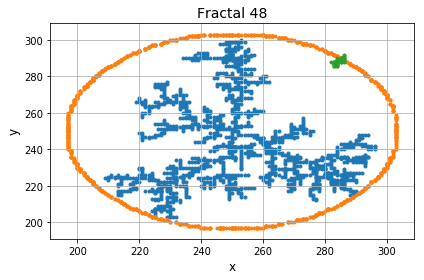

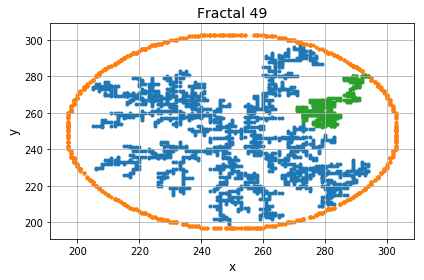

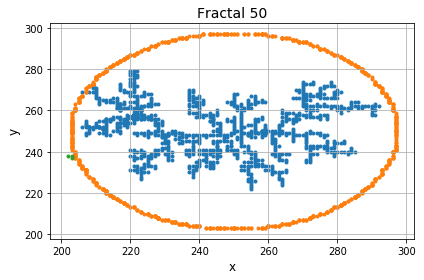

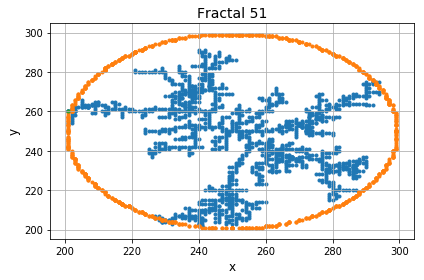

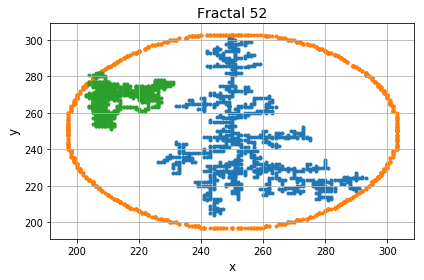

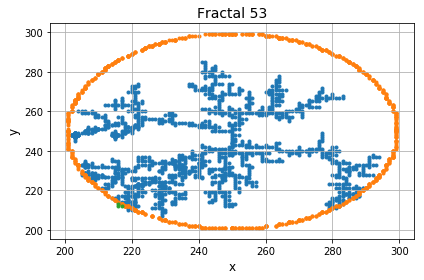

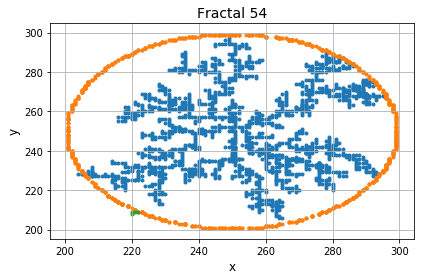

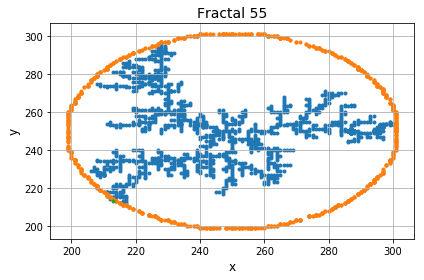

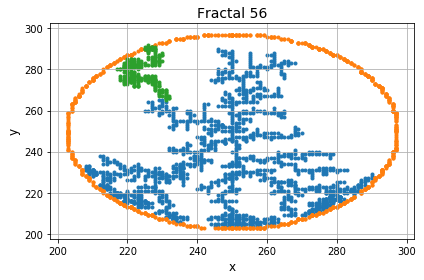

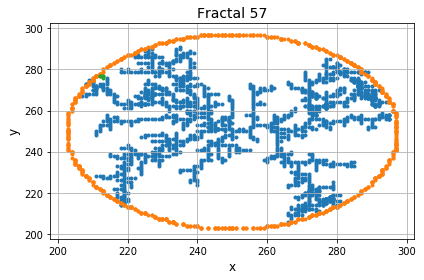

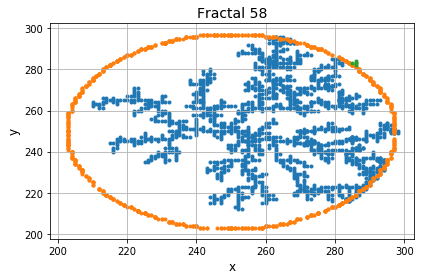

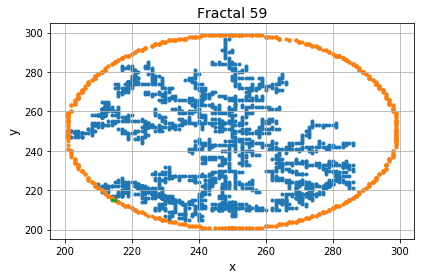

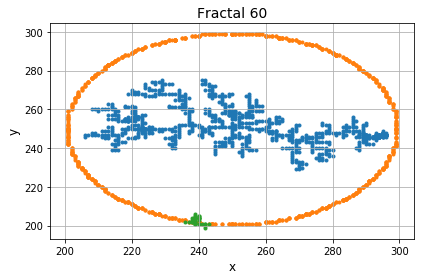

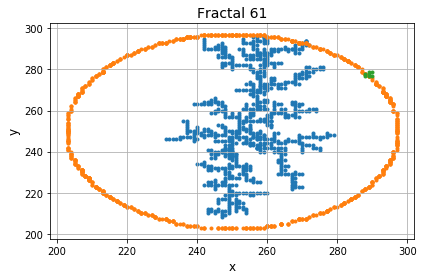

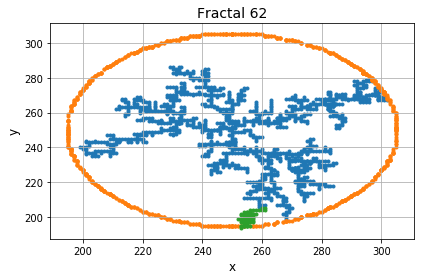

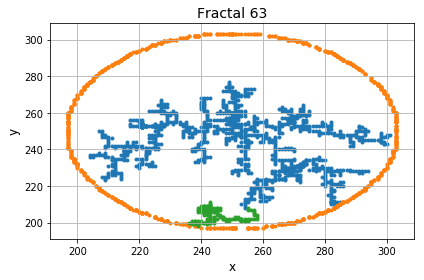

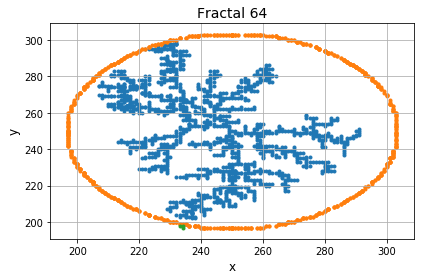

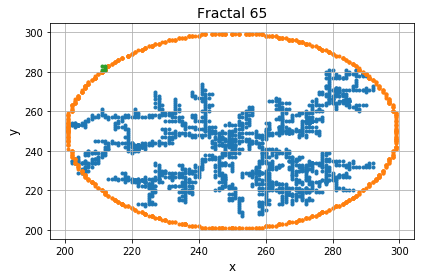

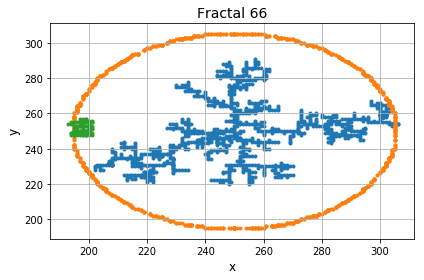

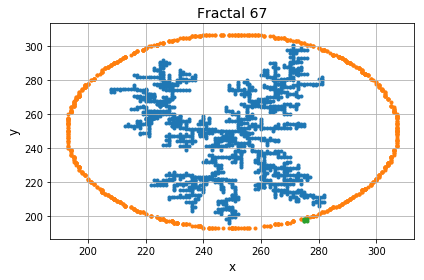

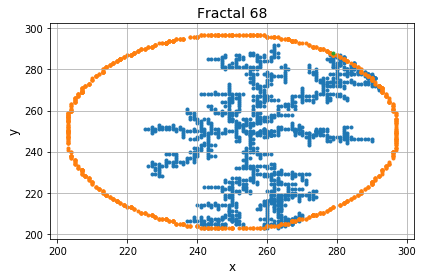

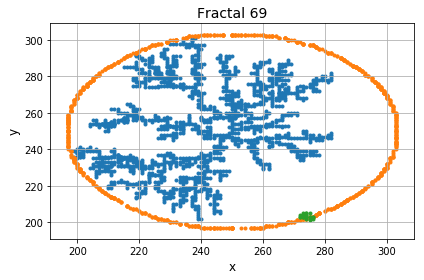

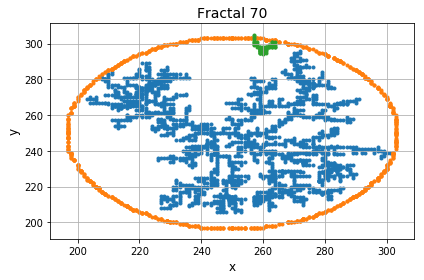

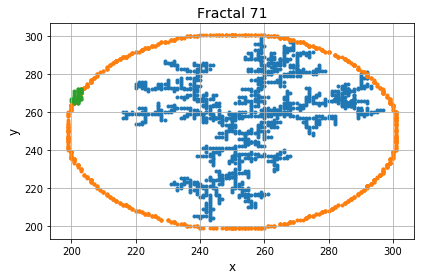

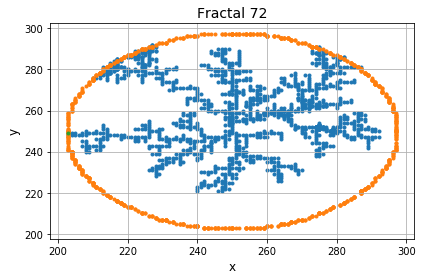

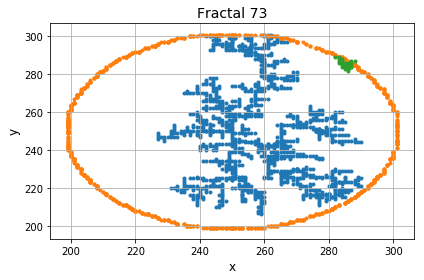

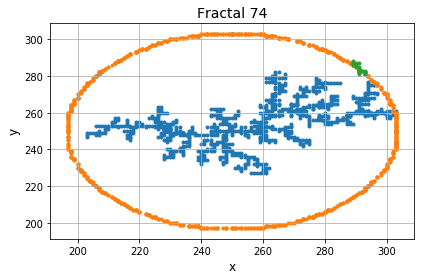

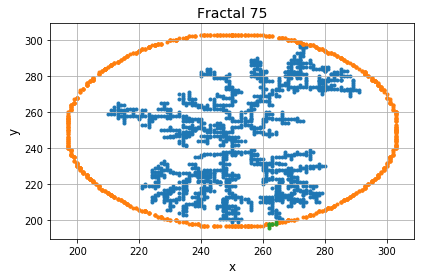

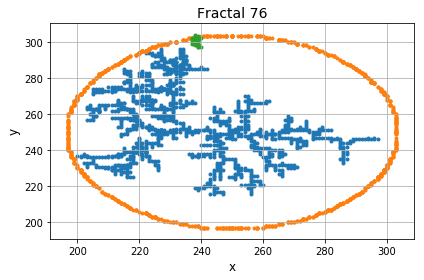

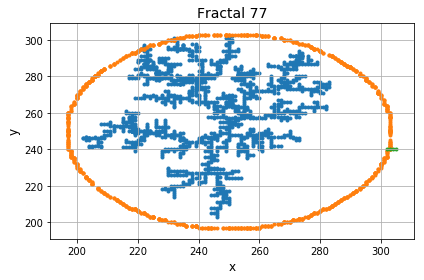

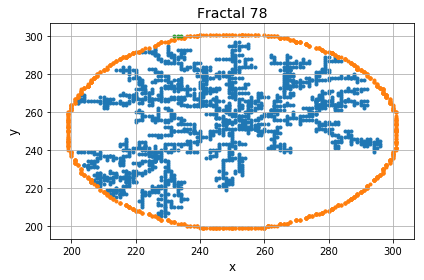

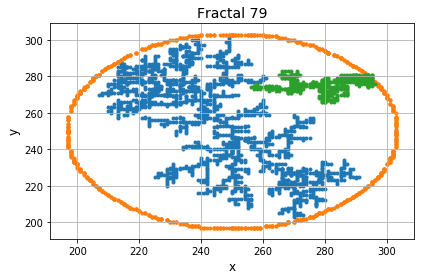

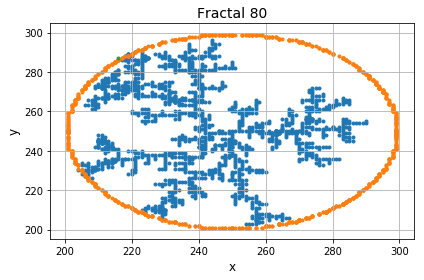

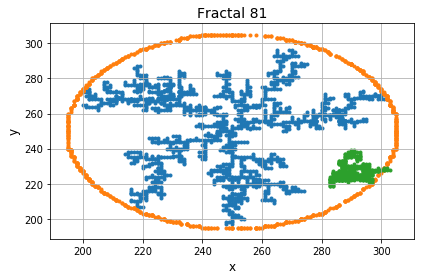

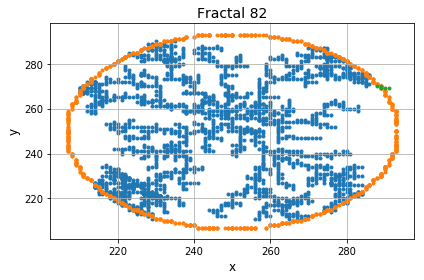

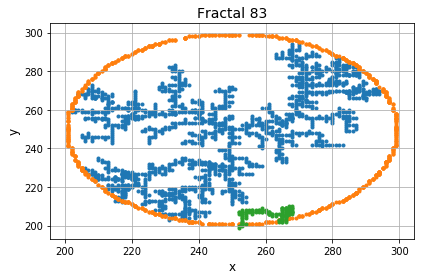

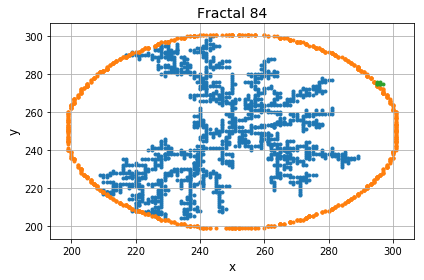

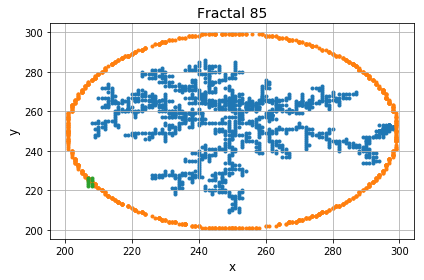

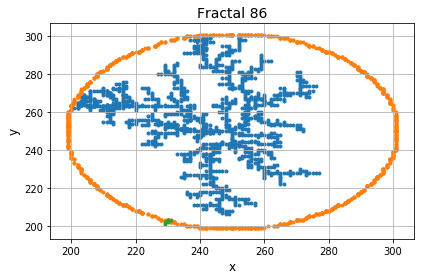

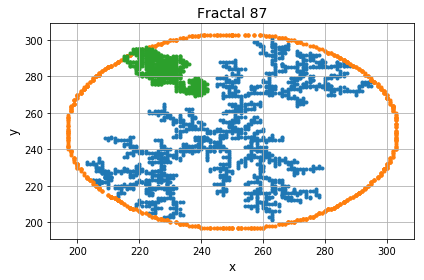

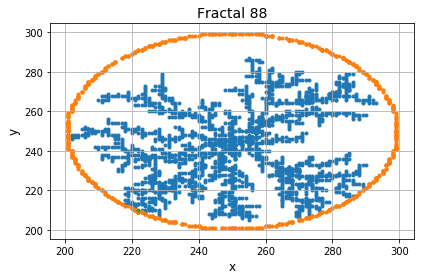

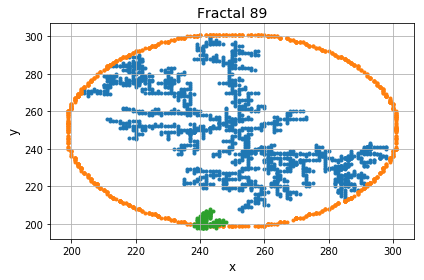

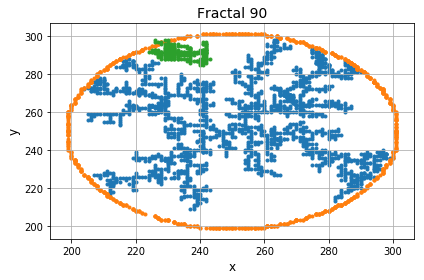

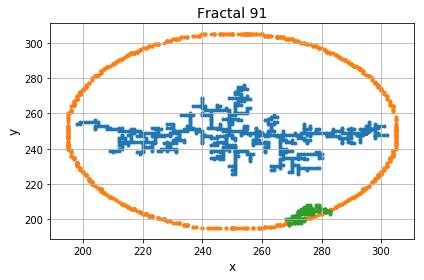

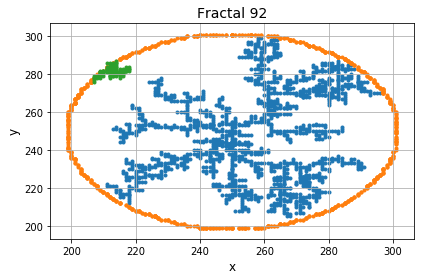

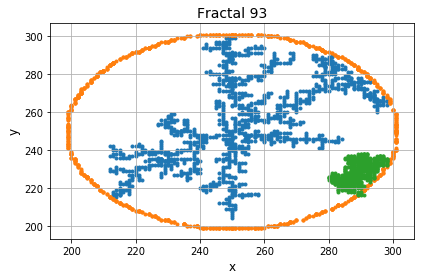

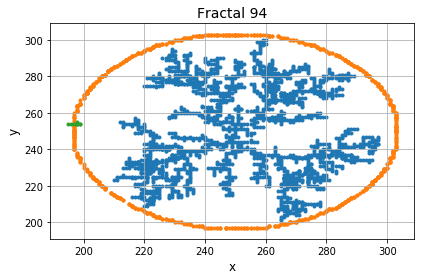

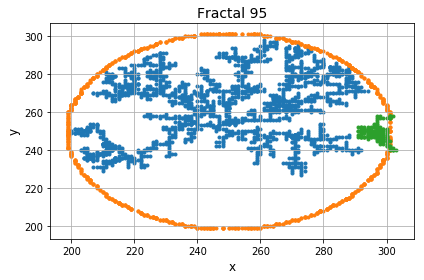

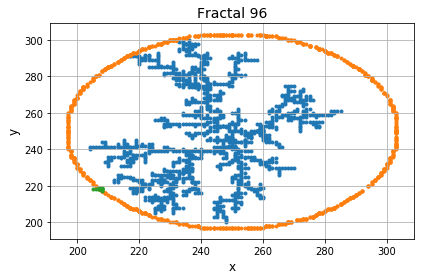

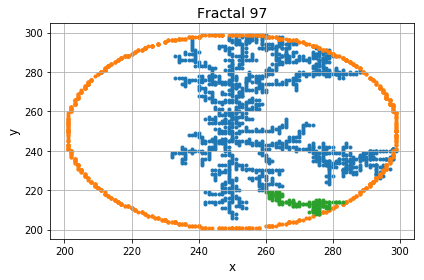

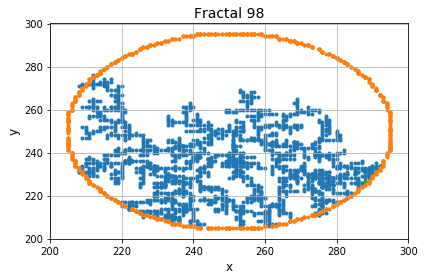

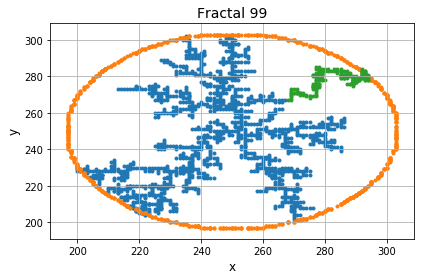

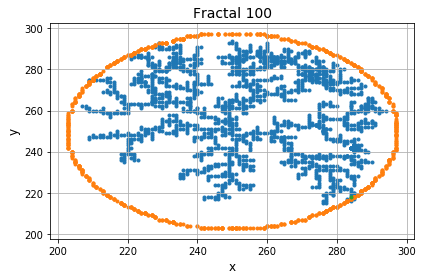

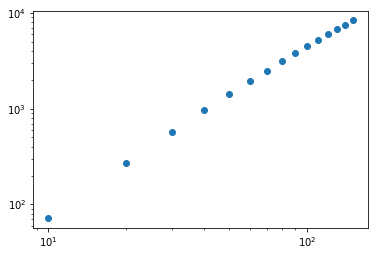

In [3]:

'''
Diffusion Limited Aggregation
'''

import pandas as pd
from matplotlib import pyplot as plt
import random as rd
import numpy as np
import math as m
from sklearn.linear_model import LinearRegression

def circle(r):
    '''Takes in radius and returns a random point of the circle
    with radius r'''
    sign = 10 * rd.random()
    if sign>=0 and sign<2.5:
        x2d = rd.randrange(-r, r+1)
        y2d = m.ceil(m.sqrt(r**2 - x2d**2))
    
    elif sign >=2.5 and sign <5:
        x2d = rd.randrange(-r, r+1)
        y2d = - m.ceil(m.sqrt(r**2 - x2d**2))
    
    elif sign>5 and sign<=7.5:
        y2d = - rd.randrange(-r, r+1)
        x2d = m.ceil(m.sqrt(r**2 - y2d**2))
    
    else:
        y2d = - rd.randrange(-r, r+1)
        x2d = - m.ceil(m.sqrt(r**2 - y2d**2))
    
    return [x2d, y2d]

points = [[250, 250], [251, 252], [249, 251], [251, 249], [254, 252], [253, 251],\
              [254, 253], [248, 252], [249, 253], [254, 249]]
frames = 15
S = np.zeros(frames)
fractals = 100
fractal_number = 1
for fractal in range(fractals):
    #intialize the problem
    N = 5000
    xdim, ydim = 500, 500
    r = 5
    dr = 2
    grid2D = np.zeros([xdim, ydim])
    first = [int(m.floor(len(grid2D)/2)), int(m.floor(len(grid2D)/2))]
    list_of_connections = [first]
    count = 0
    
    #intialize the circle that the walkers start by 
    #creating a list of 1000 points calling the circle function
    inner_circle = [circle(r) for i in range(1000)]
    for point1 in inner_circle:
        point1[0] += 250
        point1[1] += 250
    inner_circle1 = pd.DataFrame(inner_circle)
    
    
    #create the fractal
    for j in range(1,N+2):
        rrr = []
        list_of_connections1 = pd.DataFrame(list_of_connections)
        
        #resize the circles when the fractal reaches the inner radius        
        if max(list_of_connections1[0]) - min(list_of_connections1[0]) >= 2*r - r/10\
        or max(list_of_connections1[1]) - min(list_of_connections1[1]) >= 2*r - r/10:
            r += 2
            inner_circle = [circle(r) for i in range(1000)]
            for point1 in inner_circle:
                point1[0] += 250
                point1[1] += 250
            inner_circle1 = pd.DataFrame(inner_circle)
    
        #intialize the walker  
        initx = rd.choice(inner_circle1[0])
        index = list(inner_circle1[0]).index(initx)
        [x2d, y2d] = [initx, inner_circle1[1][index]]
        

        #do the random walk
        while True:
            a = rd.random()
            if a>=0 and a<1/4: 
                x2d += 1                  #move RIGHT 25%
                rrr.append([x2d, y2d])
            elif a>=1/4 and a<2/4:
                x2d -= 1                  #move lEFT 25%
                rrr.append([x2d, y2d])
            elif a>=2/4 and a<3/4:
                y2d += 1                  #move  UP 25%
                rrr.append([x2d, y2d])
            else: 
                y2d -= 1                  #move DOWN 25%
                rrr.append([x2d, y2d])
            
            if (x2d-250)**2 + (y2d-250)**2 >= (r+dr)**2: break
            
                
                #check if the NEXT position is in the list of connections
                #and if it is then the walker has reached the crystal.
                #Keep the CURRENT position in the list of connections 
                #and break the loop
            if [x2d + 1, y2d] in list_of_connections:
                    grid2D[x2d][y2d] = 1
                    list_of_connections.append([x2d, y2d])
                    break
            if [x2d - 1, y2d] in list_of_connections:
                    grid2D[x2d][y2d] = 1
                    list_of_connections.append([x2d, y2d])
                    break
            if [x2d, y2d + 1] in list_of_connections:
                    grid2D[x2d][y2d] = 1
                    list_of_connections.append([x2d, y2d])
                    break
            if [x2d, y2d - 1] in list_of_connections:
                    grid2D[x2d][y2d] = 1
                    list_of_connections.append([x2d, y2d])
                    break
    
        if j%5000==0:
            
            rrr = pd.DataFrame(rrr)       
            plt.scatter(list_of_connections1[0], list_of_connections1[1], marker='.')
            plt.scatter(inner_circle1[0], inner_circle1[1], marker='.')
            plt.scatter(rrr[0], rrr[1], marker='.')   
            plt.title(f'Fractal {fractal_number}', fontsize=14)
            plt.xlabel('x', size = 12)
            plt.ylabel('y', size= 12)    
            plt.tight_layout()
            plt.grid()
            plt.show()
            fractal_number += 1
    
    for point in points:
        L = 2
        for k in range(frames):
            a, b, c, d = point[0]-L, point[0] + L, point[1]-L, point[1] + L
            square = grid2D[a:b, c:d]    
            S[k] += np.count_nonzero(square)/fractals
            L += 2
        
l = np.array([i for i in range(10, (frames + 1)*10, 10)]).reshape(-1, 1)
clf = LinearRegression()
clf.fit(np.log(l), np.log(S))
plt.scatter(l, S)
plt.xscale('log')
plt.yscale('log')
plt.show()

In [4]:
print(f'Fractal Dimension = {clf.coef_}')

Fractal Dimension = [1.74181398]
